# A. Business Understanding

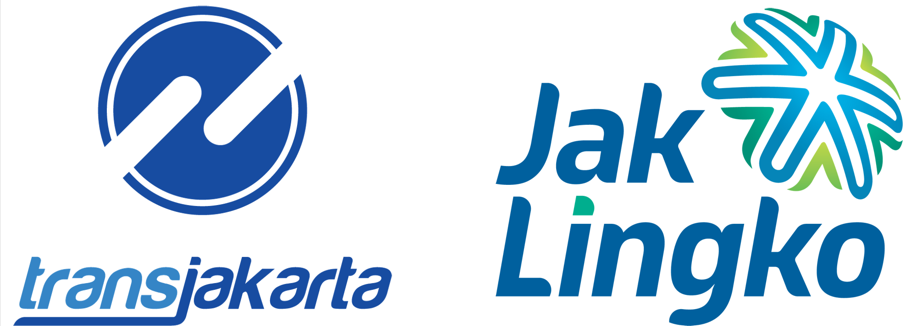

## 1. Background

TransJakarta adalah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan, serta memiliki jalur lintasan terpanjang di dunia, yaitu 208 km. Sistem BRT ini didesain berdasarkan sistem TransMilenio di Bogotá, Kolombia, dan mulai beroperasi sejak 1 Februari 2004.

Saat ini dengan tingginya tingkat kemacetan di Jakarta menekankan pentingnya pengembangan transportasi umum untuk mengatasi masalah tersebut. Dalam konteks ini, TransJakarta diharapkan dapat meningkatkan jumlah pengguna transportasi umum dan berkontribusi dalam mengurangi kemacetan di kota.

Oleh karena itu demi meningkatkan jumlah pengguna transportasi umum, transjakarta ingin meningkatkan aspek pelayanan publik dengan tetap memperhatikan efisiensi operasional dan profitabilitas, dengan harapan dengan meningkatnya efisiensi operasional dan profitabilitas perusahaan dapat meningkatkan pelayanan kepada publik. Pengembangan ini menjadi kunci dalam menciptakan solusi transportasi yang lebih efektif dan efisien di Jakarta.

## 2. Stakeholder

**Tim Bisnis atau Operasional** sebagai pemangku kepentingan utama. Sebagai tim yang bertanggung jawab memahami profit bisnis serta effektivitas manajemen perusahaan 

## 3. Problem Statement

Perussahan ingin mengetahui strategi yang tepat untuk meningkatkan profitabilitas serta meningkatkan effesiensi perusahaan dengan beberapa identifikasi yang harus dilakukan yaitu:
1. Stakeholder ingin mengetahui bagaimana `demography pengguna` Transjakarta serta Mikrotrans?
2. Stakeholder ingin mengetahui efektivitas operasional dengan melihat `hari` dan `rush hour` di halte-halte Transjakarta & Mikrotrans?
3. Stakeholder ingin mengetahui peningkatan profitabilitas apabila skenario PayAmount `Fare` tidak stagnan?

## 4. Goals
**1. Meningkatkan Pemahaman Demografi Pengguna :**
* Mengidentifikasi dan menganalisis demografi pengguna Transjakarta dan Mikrotrans untuk memahami karakteristik dan kebutuhan pelanggan. Hal ini akan membantu perusahaan menyesuaikan layanan dan strategi pemasaran yang lebih tepat sasaran.

**2. Meningkatkan Efisiensi Operasional :**
* Memantau dan mengevaluasi efektivitas operasional berdasarkan distribusi penumpang di berbagai hari dan jam sibuk (rush hour). Tujuannya adalah untuk mengoptimalkan alokasi sumber daya dan meningkatkan pengalaman pelanggan dengan mengurangi kemacetan dan waktu tunggu di halte-halte yang sibuk.

**3. Meningkatkan Profitabilitas Melalui Penyesuaian Tarif :** 
* Menguji skenario peningkatan profitabilitas dengan menyesuaikan tarif (PayAmount) berdasarkan hasil analisis. Tujuannya adalah untuk menentukan struktur tarif yang paling efektif dalam meningkatkan pendapatan tanpa mengurangi jumlah penumpang secara signifikan.

# B. Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data penumpang yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction). 

In [1281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as msno
from scipy import stats
# cf.go_offline()

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)


## 1. Kolom pada Dataset Transjakarta

**transID** : Unique transaction ID for every transaction.

**payCardID** : Customer's main identifier. The card customers use as a ticket for entrance and exit.

**payCardBank** : Customer's card bank issuer name.

**payCardName** : Customer's name embedded in the card.

**payCardSex** : Customer's sex embedded in the card.

**payCardBirthDate** : Customer's birth year.

**corridorID** : Corridor ID / Route ID as key for route grouping.

**corridorName** : Corridor Name / Route Name, containing Start and Finish for each route.

**direction** : 0 for Go, 1 for Back. Direction of the route.

**tapInStops** : Tap In (entrance) Stops ID for identifying stops name.

**tapInStopsName** : Tap In (entrance) Stops Name where customers tap in.

**tapInStopsLat** : Latitude of Tap In Stops.

**tapInStopsLon** : Longitude of Tap In Stops.

**stopStartSeq** : Sequence of the stops, 1st stop, 2nd stop, etc. Related to direction.

**tapInTime** : Time of tap in (date and time).

**tapOutStops** : Tap Out (Exit) Stops ID for identifying stops name.

**tapOutStopsName** : Tap Out (exit) Stops Name where customers tap out.

**tapOutStopsLat** : Latitude of Tap Out Stops.

**tapOutStopsLon** : Longitude of Tap Out Stops.

**stopEndSeq** : Sequence of the stops, 1st stop, 2nd stop, etc. Related to direction.

**tapOutTime** : Time of tap out (date and time).

**payAmount** : The amount customers pay. Some rides are free.

Berikut 5 data teratas dan terbawah dari dataset Transjakarta

In [1283]:
# Memanggil Data & Melihat 5 data teratas & terbawah 
tj=pd.read_csv('Transjakarta.csv')
display(tj.head(),tj.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## 2. Data Understanding
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi tipe data setiap kolom dari dataset Transjakarta.

In [1285]:
# Melihat info data tiap kolom
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

* Dilihat dari tabel info di atas dapat diketahui bahwa data di kolom `tapInTime` dan `tapOutTime` masih berupa object, maka selanjutnya kolom `tapInTime` dan `tapOutTime` akan di casting menjadi data Datetime

In [1287]:
# Casting data tapOutTime & tapInTime ke Datetime
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'])
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'])

In [1288]:
# display(tj.describe(), tj.describe(include='object'))
display(tj[['payAmount']].describe(), tj[['payCardBank','payCardSex','corridorName','tapInStopsName','tapOutStopsName','tapInTime','tapOutTime']].describe(include='object'))

,payAmount
count,36893.000000
mean,2699.712683
std,4212.225592
min,0.000000
25%,0.000000
50%,3500.000000
75%,3500.000000
max,20000.000000


,payCardBank,payCardSex,corridorName,tapInStopsName,tapOutStopsName
count,37900,37900,35970,37900,36556
unique,6,2,216,2602,2248
top,dki,F,Cibubur - Balai Kota,Penjaringan,BKN
freq,18743,20157,391,243,316


**1. Statistik Deskriptif kolom Numerik**
* nilai Min payAmount Rp.0 dengan Max payAmount Rp.20,000
* dengan rata-rata payAmount Rp. 2,699.73 dan median payAmount Rp.3,500

**2. Statistik Deskriptif kolom kategorik**
* Data menunjukkan dominasi pengguna wanita (F) dalam menggunakan layanan transportasi ini, dengan frekuensi tertinggi pada bank dki sebagai metode pembayaran.
* Pembayaran sering kali berjumlah 3500, dan ada beberapa entri dengan pembayaran nol.
* Koridor Cibubur - Balai Kota adalah rute yang paling populer, sementara Penjaringan adalah pemberhentian tap-in yang paling sering digunakan dan BKN adalah pemberhentian tap-out yang sering digunakan


In [1290]:
# Melihat data Unique setiap kolom dan jumlah value unique

pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in tj.columns :
    listItem.append( [col, tj[col].nunique(), tj[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

**Secara umum, kita bisa melihat bahwa :**

* Dataset Transjakarta memiliki 22 kolom dan 37,900 baris

* Pada tabel di atas kita dapat melihat kolom payAmount memiliki data kosong. Data kosong pada kolom tersebut diwakili dengan NaN. tetapi kita harus melihat data NaN lebih detail di sintax selanjutnya.

* Kolom transID berisikan id unik untuk tiap transaksi penumpang dan payCardID berisikan id unik untuk Card yang digunakan penumpang sehingga tidak relevan dalam analisis dan dapat dihapus.

* kolom payCardBank dan payCardName juga dapat di drop karena data tidak relevan untuk metode analisis yang akan diterapkan

* Kolom tapInTime & tapOutTime merupakan data berupa tanggal & waktu, tetapi berdasarkan kolom info, data masih berupa object. Sehingga kolom tapInTime & tapOutTime dapat di casting menjadi data Datetime untuk mempermudah analisa, serta berdasarkan kolom tanggal data penumpang Transjakarta diambil dari 1 - 30 April 2023

* Data payCardSex dan payCardBirthDate dapat digunakan untuk melihat demography penumpang (Opsional)

## 3. Data Cleaning
Agar data yang kita miliki dapat menghasilkan analisis dan kesimpulan yang baik demi menjawab pertanyaan stakeholder maka data harus dicleaning terlebih dahulu agar dapat memberikan input yang tepat

### 3.1. Missing Value
Pertama kita akan melihat sebaran missing value tiap kolom

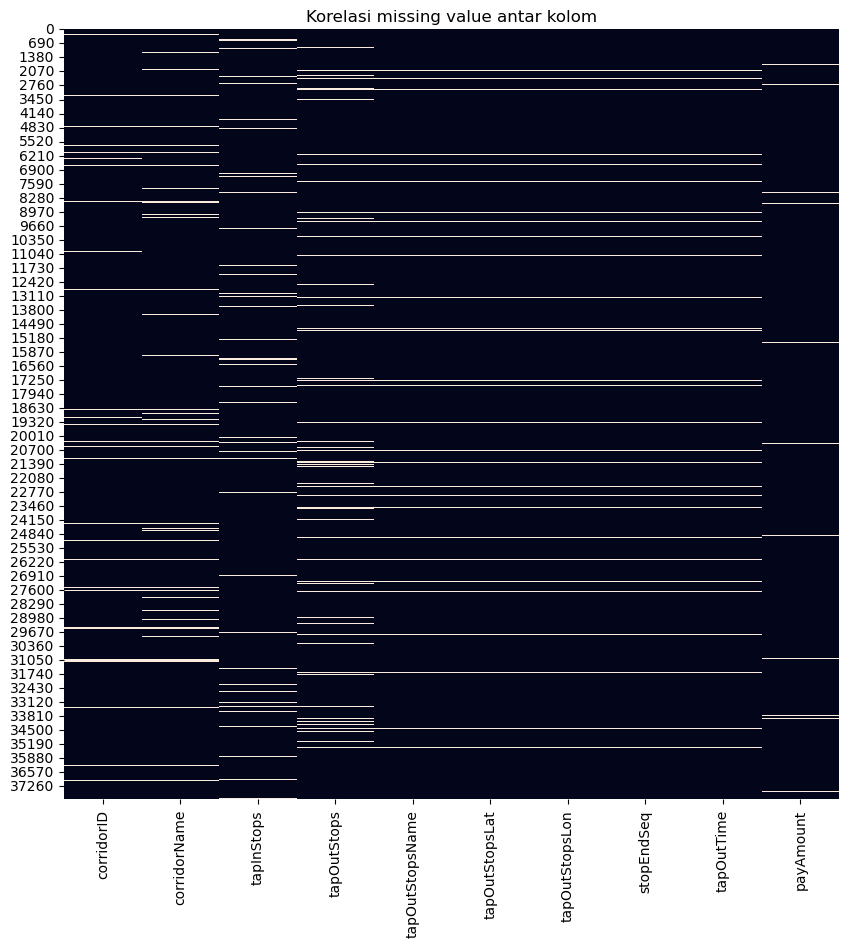

In [1293]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(tj[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna(),cbar=False)
plt.title('Korelasi missing value antar kolom')
plt.show()

dilihat dari tabel di atas kita dapat melihat jumlah & persentase null dari tiap kolom, untuk melihat lebih jelas apakah data null memiliki keterkaitan dengan data null dari tabel lain maka kita akan melihat tabel missingno di bawah 

In [1295]:
# Menghitung nilai NaN disetiap kolom
count_null = pd.DataFrame(tj.isnull().sum(), columns=['Jumlah Null'])

# Menghitung persentase nilai NaN disetiap kolom
precentage_null = pd.DataFrame(round(tj.isna().sum()/tj.shape[0]*100,2), columns=['Persentase Null (%)'])

# Gabungan kedua dataframe
combined = pd.concat([count_null, precentage_null], axis=1)

combined

,Jumlah Null,Persentase Null (%)
transID,0,0.00
payCardID,0,0.00
payCardBank,0,0.00
payCardName,0,0.00
payCardSex,0,0.00
payCardBirthDate,0,0.00
corridorID,1257,3.32
corridorName,1930,5.09
direction,0,0.00
tapInStops,1213,3.20


**Secara garis besar :**  
* *missing value* di kolom `tapOutStops`, `corridorName` memiliki proporsi yang cukup tinggi (>5%), dengan missing value di kolom `tapOutStops` mencapai 6.04%.
  
* *missing value* di kolom `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` memiliki sebaran yang terlihat berkaitan, jika data di `tapOutStops` kosong, maka kemungkinan besar data di `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq` juga kosong.  

**Ada 2 cara untuk menangani *missing value* :**
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini dapat diimplementasikan kepada baris yang memiliki nilai null di kolom `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime`dikarenakan ke-enam kolom tersebut saling berkaitan dan baris telah kehilangan 27.273% persen data sehingga akan sulit untuk di analisa.
  
* kedua, mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.

#### Tahap pertama

##### Handle Missing Value di kolom corridorName & corridorID
* kita akan mencoba meng-input missing value kolom corridorID berdasarkan corridorName dengan mencari data corridorName serupa

In [1299]:
# Menginput value NaN di kolom corridorID berdasarkan corridorName
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Waduk Pluit - Penjaringan', 
                            '12C', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Tanah Abang - Kebayoran Lama', 
                            'JAK.11', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Sunter Boulevard Barat - Penjaringan', 
                            'M12', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pulo Gebang - Pulo Gadung 2 via PIK', 
                            '11D', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Melayu - Pulo Gebang via BKT', 
                            '11Q', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Cililitan - Condet', 
                            'JAK.16', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Tanjung Priok - Pluit', 
                            '12', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Ragunan - Gelora Bung Karno', 
                            '6V', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Puri Beta - Pancoran Barat', 
                            '13B', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kalimalang - Duren Sawit', 
                            'JAK.39', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kalimalang - Duren Sawit', 
                            'JAK.39', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Rambutan - Tanjung Priok', 
                            '10D', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Stasiun Palmerah - Bundaran Senayan', 
                            '1F', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Stasiun Palmerah - Bundaran Senayan', 
                            '1F', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'PGC 1 - Ancol', 
                            '5D', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Melayu - Pondok Kelapa', 
                            'JAK.42', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Batusari - Grogol', 
                            '8K', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pasar Minggu - Tanah Abang', 
                            '9D', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Melayu - Tanah Abang', 
                            '5F', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Tongtek - Tebet Eco Park (TEP) - Cililitan', 
                            'JAK.43B', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pasar Minggu - Jagakarsa', 
                            'JAK.46', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kalideres - Gelora Bung Karno', 
                            '3F', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Terminal Tanjung Priok - Ancol Barat', 
                            'JAK.88', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rempoa - Blok M', 
                            '1Q', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pulo Gadung 2 - Dukuh Atas 2', 
                            'M4', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Flamboyan - Cengkareng', 
                            '3B', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pulo Gadung - Rawa Buaya via Balai Kota', 
                            '2A', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Harmoni - Jakarta International Stadium', 
                            'JIS3', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Cibubur - BKN', 
                            '7C', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Dukuh Atas - Casablanca via Epicentrum Raya', 
                            '6Q', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pulo Gebang - Rorotan', 
                            'JAK.27', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Jakarta International Stadium - Senen', 
                            '14', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pondok Labu - Blok M', 
                            '1E', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Summarecon Bekasi - BNN', 
                            'B11', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pantai Maju - Kota', 
                            'R1A', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Stasiun Tebet - BNN', 
                            '5B', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'St. LRT Pegangsaan Dua - JIS', 
                            '12P', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Matraman Baru - Ancol', 
                            '5', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Andara - Stasiun Universitas Pancasila', 
                            'JAK.44', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Rambutan - Monas', 
                            'M7', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Senen - Lebak Bulus', 
                            '6H', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'PGC 2 - Grogol 2', 
                            '9A', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Harapan Baru - Pulo Gebang via Rawa Kuning', 
                            'JAK.40', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'PGC 2 - Tanjung Priok', 
                            'M10', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Tanah Abang - Jembatan Lima', 
                            'JAK.13', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Joglo - Blok M', 
                            '8D', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Ciledug - Tendean', 
                            '13', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pelabuhan Kaliadem - Kota', 
                            '12A', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Lebak Bulus - Petukangan', 
                            'JAK.32', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rawamangun - Klender', 
                            'JAK.34', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rawamangun - Tanah Merah', 
                            'JAK.59', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Roxy - Benhil', 
                            'JAK.08', 
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pluit - Senen', 
                            '12B',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pinang Ranti - Pulo Gadung', 
                            '4F',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Tanjung Priok - Sukapura', 
                            'JAK.29',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Taman Waduk Papanggo - Kota Tua', 
                            'JAK.118',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Ragunan - MH Thamrin via Semanggi', 
                            '6B',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Puri Beta - Dukuh Atas', 
                            '13C',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Puri Beta 2 - Tendean', 
                            'M13',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pulo Gadung - Monas', 
                            '2',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Monas - Pantai Indah Kapuk', 
                            'BW9',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Tanjung Priok - Senen via Taman BMW', 
                            '10K',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kalideres - Puri Kembangan', 
                            'JAK.50',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Pesakih - Kalideres', 
                            '3A',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Marunda - Tanjung Priok', 
                            '10A',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rawamangun - Duren Sawit', 
                            'JAK.26',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Dwikora - Penas Kalimalang', 
                            'JAK.22',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Lenteng Agung - Aseli', 
                            'JAK.64',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Cilincing - Rorotan', 
                            'JAK.58',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pinang Ranti - Pramuka', 
                            '9N',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Lebak Bulus - Pasar Baru via Tomang', 
                            '8',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'BSD - Jelambar', 
                            'S11',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Stasiun Tebet - Rusun Karet Tengsin', 
                            'JAK.48A',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Komarudin - Penggilingan', 
                            '11K',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Kapuk Muara - Penjaringan', 
                            '3C',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kelapa Gading - Rusun Kemayoran', 
                            'JAK.60',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Grogol - Meruya via Roxy', 
                            'JAK.30',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Terminal Kampung Melayu - Kapin Raya', 
                            'JAK.84',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kalideres - Bundaran HI via Veteran', 
                            '3',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Pinus Elok - Rusun Pulo Gebang', 
                            '11C',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pantai Maju - Balai Kota', 
                            '1A',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Ragunan - Blok M via Kemang', 
                            '6N',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Melayu - Pulo Gadung', 
                            'JAK.41',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Cililitan - Dwikora', 
                            'JAK.21',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pasar Minggu - Velbak', 
                            '6T',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Tanah Abang - St. Gondangdia', 
                            'M1H',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Stasiun Tebet - Karet via Patra Kuningan', 
                            '6C',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Bekasi Barat - Blok M', 
                            'B13',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Stasiun Palmerah - Tosari', 
                            '1B',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Melayu - Ragunan', 
                            '5N',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Rambutan - Bidara Cina', 
                            '7',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Cipinang Muara - Jatinegara', 
                            '11N',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'JIS - Terminal Muara Angke', 
                            'JAK120',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Rambutan - Blok M', 
                            '7B',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Lebak Bulus - Cipulir', 
                            'JAK.49',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Kampung Rambutan - Juanda via Pasar Baru', 
                            '7F',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Jelambar - Juanda', 
                            '8A',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'BKN - Blok M', 
                            'M7B',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Tanah Abang - Meruya', 
                            'JAK.14',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Pinang Ranti - Pluit', 
                            '9',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Cipinang Besar Selatan - Penas Kalimalang', 
                            '10B',
                            tj['corridorID'])
tj['corridorID'] = np.where(tj['corridorName'] == 'Rusun Marunda - Terminal Terpadu Pulo Gebang', 
                            'JAK.110A',
                            tj['corridorID'])

*  Kita sudah menghandle missing value di kolom corridorID, sehingga selanjutnya kita dapat menginput value NaN di kolom corridorName dengan value di kolom corridorID tanpa khawatir value NaN di kolom corridorID akan mengoverride value di kolom corridorName

In [1301]:
# Input value NaN di kolom 'corridorName' berdasarkan 'corridorID'
tj['corridorName'] = tj.groupby('corridorID')['corridorName'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
    if pd.notna(x.name) else x
)

##### Handle Missing Value di kolom tapInStops berdasarkan kolom tapInStopsName
* dikarenakan data tapInStopsName tidak memiliki data Null maka kolom tapInStops dapat di input langsung berdasarkan tapInStopsName

In [1303]:
# Input value NaN di kolom 'tapInStops' berdasarkan kolom 'tapInStopsName'
tj['tapInStops'] = tj.groupby('tapInStopsName')['tapInStops'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
    if pd.notna(x.name) else x
)

##### Handle Missing Value di kolom tapOutStops berdasarkan kolom tapOutStopsName
dari kolom tapOutStopsName kita juga dapat men- generate kolom tapOutStops, maka dari itu data null di kolom tapOutStops dengan tapOutStopsName

In [1305]:
# Input value NaN di kolom 'tapOutStops' berdasarkan kolom 'tapOutStopsName'
tj['tapOutStops'] = tj.groupby('tapOutStopsName')['tapOutStops'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
    if pd.notna(x.name) else x
)

##### Handle Missing Value di kolom payAmount

* untuk Tipe Transportasi Mikrotrans payAmount nya sebesar Rp.0 sehingga kita dapat mengisi data payAmount sebesar 0 untuk corridorID mengandung str 'JAK'

In [1308]:
# mengisi nilai dengan memberikan ketentuan apabila ada layanan dengan kode 'JAK' maka tarifnya 0 
condition = tj['corridorID'].str.contains('JAK', na=False)

# Memperbarui payamount untuk kode rute yang memenuhi kondisi
tj.loc[condition, 'payAmount'] = 0

untuk data Missing Value di kolom payAmount yang masih belum terinput selanjutnya akan di check distribusi datanya untuk menentukan apakah data sebaiknya di input menggunakan Mean atau Median

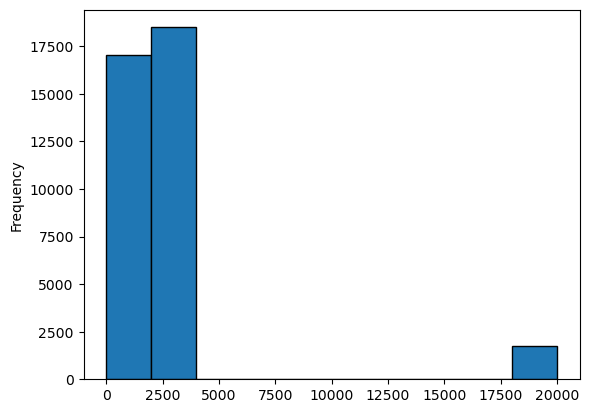

In [1310]:
# Melihat Distibusi Data payAmount
tj['payAmount'].plot(kind='hist', edgecolor='black')
plt.show()

In [1311]:
data = tj['payAmount'].dropna()
stat, p_value = stats.shapiro(data)
print(f'Statistik Uji: {stat}')
print(f'P-Value: {p_value}')

Statistik Uji: 0.5104931592941284
P-Value: 0.0


**Hipotesa Uji Normalitas Data menggunakan Saphiro Wilk**

- $H_{0} $: Data mengikuti distribusi normal

- $H_{1} $: Data tidak mengikuti distribusi normal

- significancy ($\alpha$) : 0.05
- p-value → 0.0
- p-value < 0.05 → Reject $H_{0}$
Artinya Data tidak tidak terdistibusi normal.

 Melihat dari hasil uji hipotesis normalitas menggunakan saphiro wilk dan diagram Histogram (Skew Positif) dapat dibuktikan bahwa **Data tidak terdistribusi normal** sehingga Missing Value sebaiknya di input menggunakan Median 

In [1314]:
# Menginput value NaN pada payAmount menggunakan data Median
tj['payAmount'].fillna(value=tj['payAmount'].median(),inplace=True)

#### Tahap kedua

- Setelah menginput missing value terdapat beberapa missing value yang masih ada di kolom `corridorName`, `tapInStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime`,  dikarenakan missing value tidak dapat di input dengan bantuan corridorID maupun tapOutStops 

In [1316]:
pd.DataFrame(round(tj.isna().sum()/tj.shape[0]*100,2), columns=['Persentase Null (%)'])

,Persentase Null (%)
transID,0.00
payCardID,0.00
payCardBank,0.00
payCardName,0.00
payCardSex,0.00
payCardBirthDate,0.00
corridorID,2.97
corridorName,3.01
direction,0.00
tapInStops,0.09


In [1317]:
total_baris_null = tj.isnull().any(axis=1).sum()
total_baris = tj.shape[0]


print(f"Total baris yang memiliki data null: {total_baris_null} \nPersentase %  yang memiliki data null: {round((total_baris_null/total_baris)*100,2)}%")

Total baris yang memiliki data null: 2489 
Persentase %  yang memiliki data null: 6.57%


Berdasarkan presentase missing value yang tersisa tiap kolom nya kurang dari 5% dan persentase baris yang memiliki data null sebesar 6.57%  oleh karena presentase yang kecil tidak akan mempengaruhi hasil analisa data maka tahap selanjutnya missing value akan di drop atau dihapus

In [1323]:
# menghapus sisa missing value 
tj.dropna(inplace=True)

#### Menghapus kolom yang tidak relevan

In [1326]:
tj.drop(columns=['transID','payCardID', 'payCardBank','payCardName'],inplace=True)
tj

,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


### 3.2. Data Duplikat

- Selanjutnya kita akan melihat apakah terdapat data duplikat pada dataset

In [1329]:
tj.duplicated().sum()

0

Dari hasil sintax di atas tidak terdapat data duplikat pada dataset

### 3.3. Data Outlier

- Selanjutnya kita akan melihat apakah terdapat data Outlier pada dataset

In [1332]:
list_columns=['payCardBirthDate','payAmount']

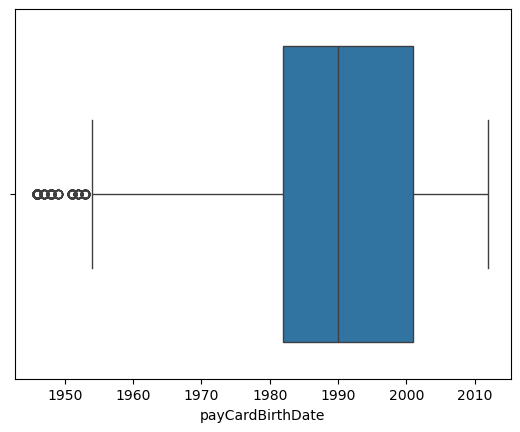

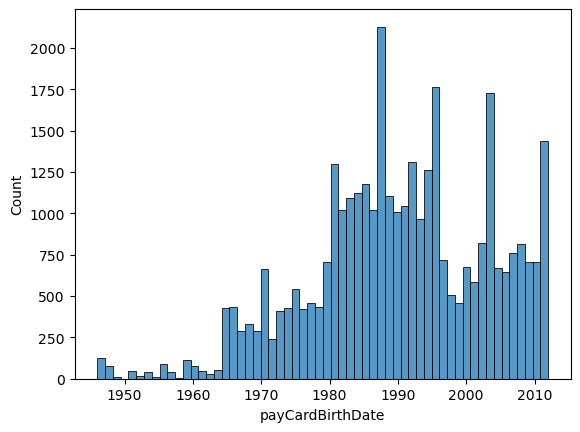

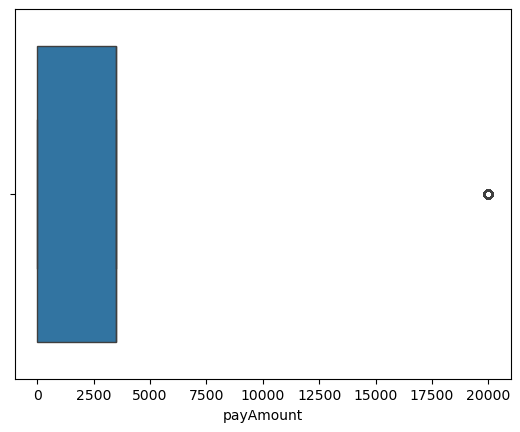

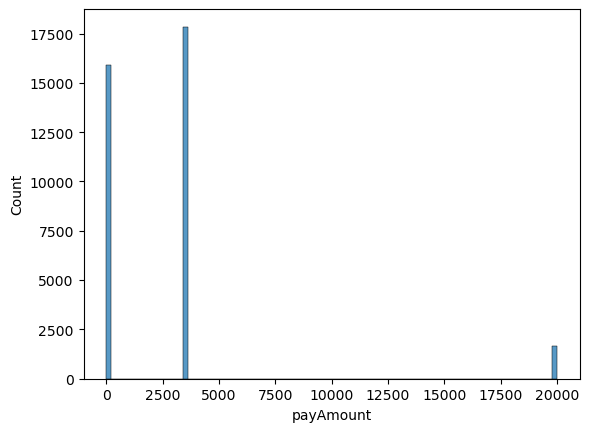

In [1334]:
for i in list_columns:
    sns.boxplot(x=tj[i])
    plt.show()
    sns.histplot(x=tj[i])
    plt.show()

Berdasarkan visualisasi Boxplot terdapat Outlier pada dataset, tetapi data tidak akan di transformasi untuk menghandle outlier ataupun di hapus dikarenakan tidak akan mempengaruhi analisa data di tahap selanjutnya. sehingga outlier akan dipertahankan

# C. Analisis 
* Setelah data sudah cleaned maka tahap selanjutnya adalah menganalisa data untuk menjawab problem statement di atas

## 1. Demografi Penumpang Transjakarta & Mikrotrans
untuk melihat demografi penumpang Transjakarta & Mikrotran dapat dilihat dengan:
* Demografi penumpang Laki-laki dan Perempuan berdasarkan tipe transportasi
* Demografi usia penumpang berdasarkan tipe transportasi
* Demografi penumpang Laki-laki dan Perempuan berdasarkan umur

In [1339]:
# Membuat kolom type menggunakan kolom corridorID
tj['type']=np.where(~tj['corridorID'].str.contains('JAK'),'Transjakarta','MikroTrans')

# Membuat kolom Age menggunakan kolom payCardBirthDate
tj['passangerAge']=2024-tj['payCardBirthDate']



In [1341]:
# Group berdasarkan gender dan tipe transportasi 
jumlah_penumpang_gender = tj.groupby(['type', 'payCardSex']).size().reset_index(name='count')
jumlah_penumpang_gender.set_index(['type', 'payCardSex'], inplace=True)
jumlah_penumpang_gender

count
type         payCardSex       
MikroTrans   F            6933
             M            6030
Transjakarta F           11906
             M           10542

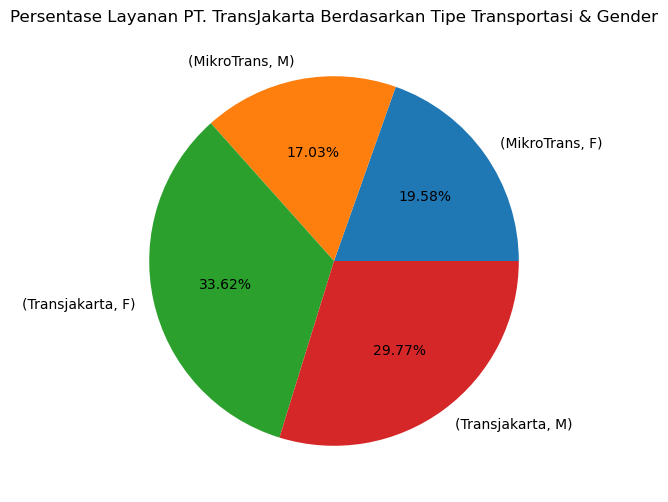

In [1342]:
# Visualisasi data berdasarkan gender & tipe transportasi
plt.figure(figsize=(10, 6))
jumlah_penumpang_gender['count'].plot(kind='pie', autopct='%.2f%%')
plt.title('Persentase Layanan PT. TransJakarta Berdasarkan Tipe Transportasi & Gender')
plt.ylabel('')
plt.show()

`Insight` Pie Chart:

**1. Dominasi Penumpang Transjakarta (Wanita) :**
* Segmen terbesar dalam pie chart adalah penumpang Transjakarta dengan jenis kelamin wanita, yang mencakup 33.62% dari total penumpang. Hal ini menunjukkan bahwa wanita lebih sering menggunakan layanan Transjakarta dibandingkan kelompok lain.

**2. Penumpang Transjakarta (Pria) Menyumbang Hampir 30% :**
* Pria yang menggunakan layanan Transjakarta menyumbang 29.77% dari total penumpang. Jika digabungkan dengan penumpang wanita Transjakarta, kedua kelompok ini mencakup lebih dari 63% total penumpang, menegaskan dominasi Transjakarta sebagai moda transportasi pilihan.

**3. Penggunaan MikroTrans oleh Pria dan Wanita Relatif Merata :**
* Penggunaan MikroTrans oleh wanita adalah 19.58%, sedangkan pria menyumbang 17.03% dari total penumpang. Perbedaan ini tidak terlalu besar, menunjukkan bahwa baik pria maupun wanita relatif seimbang dalam menggunakan MikroTrans.

**4. Peran Signifikan MikroTrans :**
* Meski lebih kecil dari Transjakarta, layanan MikroTrans tetap memainkan peran penting, terutama di kalangan wanita dengan persentase mendekati 20%. Ini mungkin menunjukkan bahwa MikroTrans menawarkan manfaat tertentu yang menarik bagi pengguna wanita sebagai contoh salah satunya 0 payAmount.

**5. Potensi Pengembangan Layanan :**
* Dengan wanita sebagai pengguna terbesar, ada peluang bagi PT. TransJakarta untuk meningkatkan layanan yang lebih sesuai dengan kebutuhan dan preferensi wanita, misalnya dengan menyediakan fasilitas keamanan, kenyamanan, dan armada tambahan.

**6. Penggunaan MikroTrans oleh Pria :**
* Meskipun segmen terkecil, pria yang menggunakan MikroTrans masih memiliki pangsa yang cukup signifikan (17.03%). Ini bisa menjadi area yang potensial untuk pertumbuhan dengan meningkatkan layanan yang lebih baik bagi segmen ini.

In [1344]:
#Membuat binning age untuk mempermudah dalam visualisasi
bins = [12, 24, 37, 50, 100]  # Definisikan batas umur
labels = ['12-24', '25-37', '38-50', '51-78']
tj['age_group'] = pd.cut(tj['passangerAge'], bins=bins, labels=labels, right=False)

# Group by berdasarkan age_group dan tipe transportasi
grouped = tj.groupby(['age_group', 'type']).size().reset_index(name='jumlah')
grouped

,age_group,type,jumlah
0,12-24,MikroTrans,2893
1,12-24,Transjakarta,5982
2,25-37,MikroTrans,4270
3,25-37,Transjakarta,7473
4,38-50,MikroTrans,4091
5,38-50,Transjakarta,6418
6,51-78,MikroTrans,1709
7,51-78,Transjakarta,2575


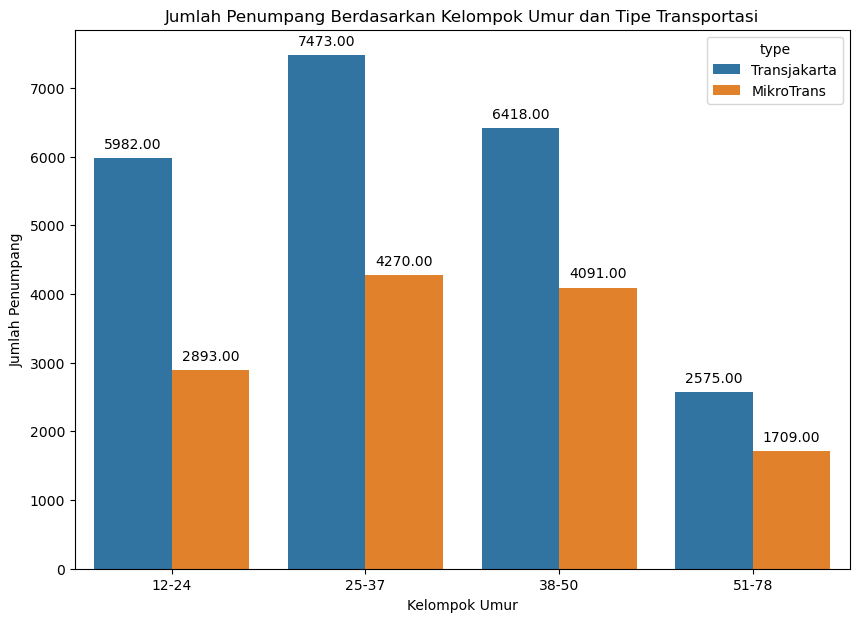

In [1347]:
# Membuat Visualisasi data menggunakan Barplot
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=tj, x='age_group',hue='type')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Penumpang Berdasarkan Kelompok Umur dan Tipe Transportasi')

# Menambahkan anotasi pada setiap batang plot
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Check if the height is greater than 0
        ax.annotate(format(height, '.2f'),
                    (p.get_x() + p.get_width() / 2., height - 0.05),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')
plt.show()

`Insight` Bar Plot:

**1. Transjakarta Mendominasi di Semua Kelompok Umur :**
* Transjakarta memiliki jumlah penumpang yang lebih tinggi dibandingkan MikroTrans di semua kelompok umur. Ini mungkin disebabkan oleh cakupan layanan Transjakarta yang lebih luas atau kenyamanan yang ditawarkan oleh bus Transjakarta.
    
**2. Pengguna MikroTrans Signifikan di Kelompok Umur 38-50 Tahun :**
* Kelompok umur 38-50 tahun menunjukkan penggunaan MikroTrans yang cukup tinggi, meskipun masih di bawah Transjakarta. Ini bisa menunjukkan preferensi dari pengguna yang lebih tua terhadap layanan MikroTrans yang mungkin lebih sesuai dengan kebutuhan mereka.
 
**3. Kelompok Umur Termuda dan Tertua Memiliki Jumlah Penumpang Terendah :**
* Kelompok umur 12-24 tahun dan 51-78 tahun memiliki jumlah penumpang yang lebih rendah dibandingkan kelompok umur lainnya. Hal ini bisa disebabkan oleh preferensi transportasi lain, seperti kendaraan pribadi atau jarang bepergian.
      
**4. Kesetaraan Relatif Antara Transjakarta dan MikroTrans di Kelompok Umur 51-78 Tahun :**
* Pada kelompok umur 51-78 tahun, perbedaan antara jumlah penumpang Transjakarta dan MikroTrans lebih kecil dibandingkan kelompok umur lainnya. Ini bisa mengindikasikan bahwa pengguna yang lebih tua cenderung memiliki preferensi yang lebih seimbang antara kedua jenis transportasi ini.
   
**5. Potensi Target Pasar :**
* Mengingat dominasi pengguna di kelompok usia produktif (25-37 tahun), ada peluang untuk mengembangkan layanan yang lebih disesuaikan dengan kebutuhan dan preferensi mereka. Selain itu, meningkatkan layanan untuk kelompok umur 12-24 tahun dan 51-78 tahun dapat membantu meningkatkan jumlah penumpang di kelompok ini.


## 2. Efektivitas operasional dilihat dari hari dan rush hour Transjakarta & Mikrotrans
untuk melihat Hari Teramai dan Jam Tersibuk Transjakarta & Mikrotran dapat dilihat dengan:
* Trend Distribusi Penumpang secara harian dari senin - minggu 
* Trend Distribusi Penumpang secara Waktu Tap in Penumapng 

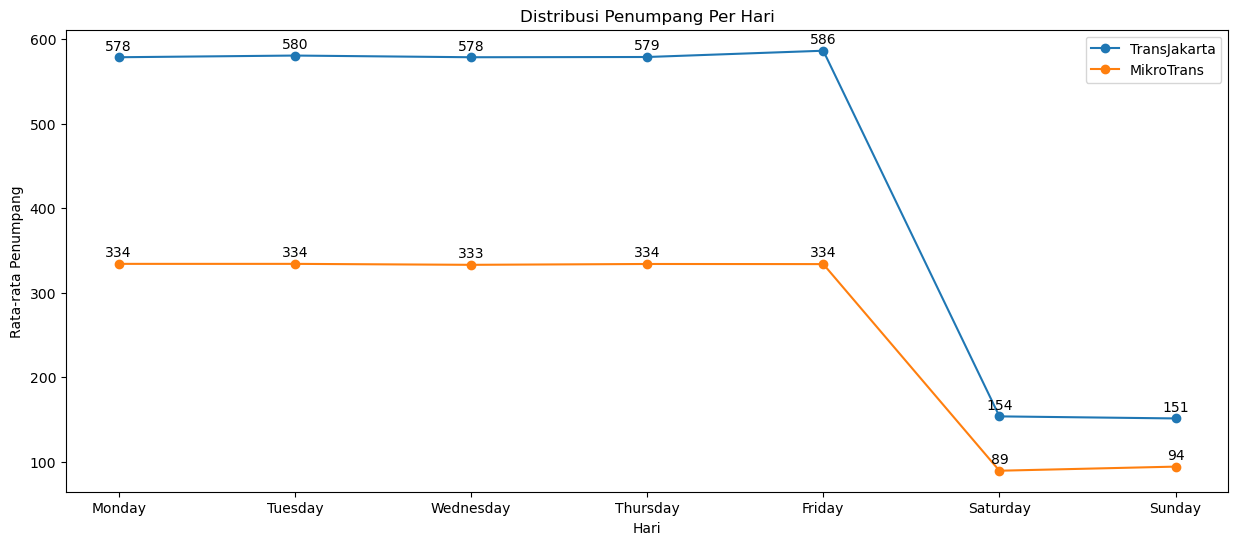

In [1350]:
tj['day'] = tj['tapInTime'].dt.strftime('%A')

selected_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Mengatur urutan hari 
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Mengantur urutan hari pada data
tj['day'] = pd.Categorical(tj['day'], categories=ordered_days, ordered=True)

count_transjakarta = tj[(tj['type'] == 'Transjakarta') & (tj['day'].isin(selected_days))]
count_mikrotrans = tj[(tj['type'] == 'MikroTrans') & (tj['day'].isin(selected_days))]

avg_day_transjakarta = count_transjakarta.groupby('day').size() / len(count_transjakarta['day'].unique())
avg_day_mikrotrans = count_mikrotrans.groupby('day').size() / len(count_mikrotrans['day'].unique())

plt.figure(figsize=(15, 6))
plt.plot(avg_day_transjakarta.index, avg_day_transjakarta.values, label='TransJakarta', marker='o', linestyle='-')
plt.plot(avg_day_mikrotrans.index, avg_day_mikrotrans.values, label='MikroTrans', marker='o', linestyle='-')

plt.xlabel('Hari')
plt.ylabel('Rata-rata Penumpang')
plt.title('Distribusi Penumpang Per Hari')
plt.legend()

for x, y in zip(avg_day_transjakarta.index, avg_day_transjakarta.values):
    plt.text(x, y + 5, f'{y:.0f}', ha='center', va='bottom')

for x, y in zip(avg_day_mikrotrans.index, avg_day_mikrotrans.values):
    plt.text(x, y + 5, f'{y:.0f}', ha='center', va='bottom')

plt.show()


`Insight` Line Plot:

**1. Konsistensi Jumlah Penumpang pada Hari Kerja :**

* Rata-rata jumlah penumpang TransJakarta dan MikroTrans relatif stabil dari hari Senin hingga Jumat. TransJakarta memiliki rata-rata sekitar 578-586 penumpang per hari, sedangkan MikroTrans memiliki rata-rata sekitar 332-334 penumpang per hari.

* Ini menunjukkan bahwa kedua layanan ini memiliki basis pengguna yang stabil selama hari kerja, kemungkinan besar digunakan oleh pekerja dan pelajar.

**2. Penurunan Signifikan pada Akhir Pekan :**

* Terjadi penurunan tajam pada jumlah penumpang untuk kedua layanan pada hari Sabtu dan Minggu. TransJakarta turun dari sekitar 586 penumpang pada hari Jumat menjadi 153 pada hari Sabtu, sementara MikroTrans turun dari 333 penumpang menjadi 89 pada hari Sabtu.

* Penurunan ini menunjukkan bahwa penggunaan transportasi umum ini berkurang signifikan selama akhir pekan, kemungkinan karena aktivitas rutin seperti bekerja dan sekolah tidak berlangsung pada hari-hari tersebut.


**3. Puncak Penggunaan pada Hari Jumat :**

* Rata-rata penumpang TransJakarta sedikit meningkat pada hari Jumat, mencapai puncak tertinggi dalam seminggu dengan 586 penumpang. Ini mungkin menunjukkan adanya peningkatan mobilitas pada akhir minggu kerja, mungkin terkait dengan aktivitas yang memerlukan perjalanan tambahan seperti belanja atau persiapan akhir pekan.

**4. Perbedaan Penurunan antara TransJakarta dan MikroTrans :**

* Penurunan penumpang MikroTrans dari Jumat ke Sabtu (sekitar 73%) lebih tajam dibandingkan penurunan pada TransJakarta (sekitar 74%). Ini bisa mengindikasikan bahwa MikroTrans, yang mungkin lebih sering digunakan untuk perjalanan pendek atau lokal, mengalami pengurangan yang lebih signifikan dalam penggunaannya selama akhir pekan.

**5. Kesamaan Tren Penurunan :**

* Meskipun jumlah rata-rata penumpang berbeda, pola penurunan dari hari kerja ke akhir pekan mirip untuk kedua layanan, menunjukkan bahwa perilaku mobilitas pengguna TransJakarta dan MikroTrans serupa dalam hal ini.


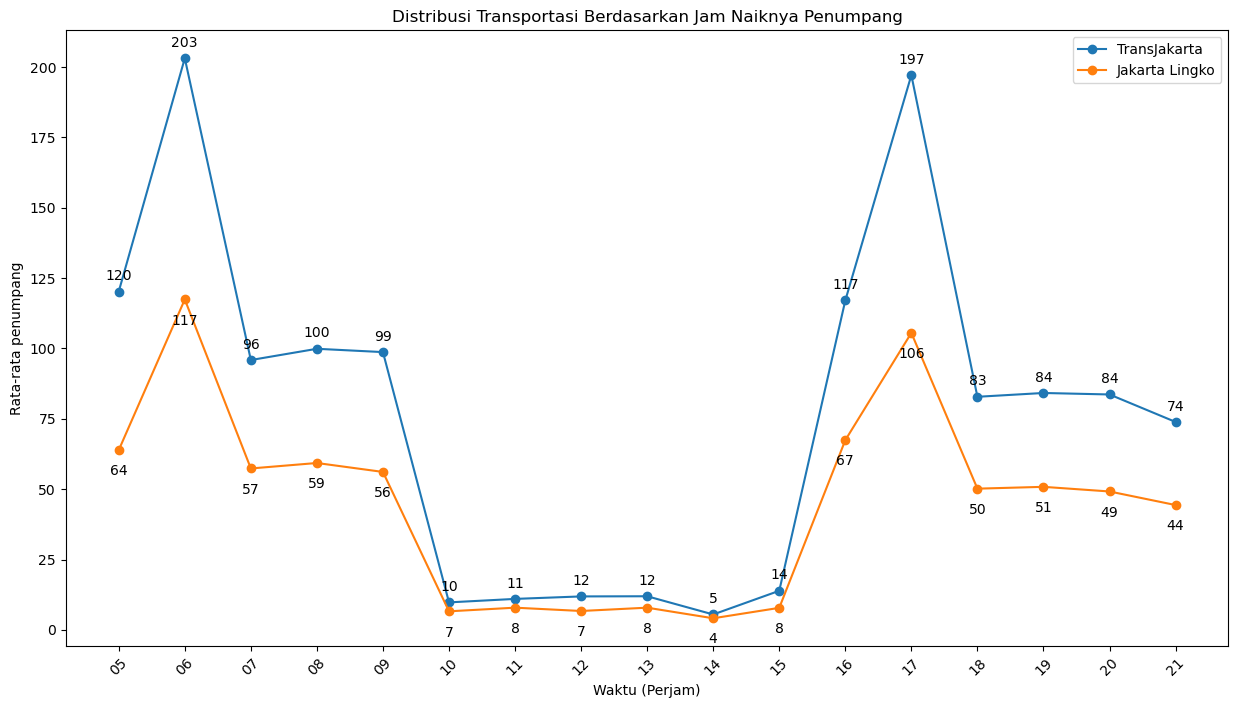

In [1352]:
tj['hour'] = tj['tapInTime'].dt.strftime('%H')
selected_time = ['05', '06', '07', '08', '09', '10','11','12','13','14','15','16','17','18','19','20','21']

count_transjakarta = tj[(tj['type'] == 'Transjakarta') & (tj['hour'].isin(selected_time))]
count_mikrotrans = tj[(tj['type'] == 'MikroTrans') & (tj['hour'].isin(selected_time))]

avg_hour_transjakarta = count_transjakarta.groupby('hour').size() / len(count_transjakarta['hour'].unique())
avg_hour_mikrotrans = count_mikrotrans.groupby('hour').size() / len(count_mikrotrans['hour'].unique())

plt.figure(figsize=(15, 8))

# Perbaikan pada penggunaan variabel yang sesuai
plt.plot(avg_hour_transjakarta.index, avg_hour_transjakarta.values, label='TransJakarta', marker='o', linestyle='-')
plt.plot(avg_hour_mikrotrans.index, avg_hour_mikrotrans.values, label='Jakarta Lingko', marker='o', linestyle='-')

plt.xlabel('Waktu (Perjam)')
plt.ylabel('Rata-rata penumpang')
plt.title('Distribusi Transportasi Berdasarkan Jam Naiknya Penumpang')
plt.xticks(rotation=45)
plt.legend()

# Perbaikan pada anotasi menggunakan variabel yang benar
for x, y in zip(avg_hour_transjakarta.index, avg_hour_transjakarta.values):
    plt.text(x, y + 3, f'{y:.0f}', ha='center', va='bottom')

for x, y in zip(avg_hour_mikrotrans.index, avg_hour_mikrotrans.values):
    plt.text(x, y - 10, f'{y:.0f}', ha='center', va='bottom')

plt.show()


`Insight` Lineplot :

**1. Dua Puncak Utama pada Jam Sibuk :**
* Transjakarta menunjukkan dua puncak utama pada jam 06:00 (3.453 penumpang) dan jam 17:00 (3.351 penumpang). Ini menunjukkan bahwa Transjakarta banyak digunakan oleh penumpang selama jam sibuk, baik di pagi hari ketika orang berangkat kerja atau sekolah, maupun di sore hari ketika mereka pulang.
Jakarta Lingko juga menunjukkan pola yang mirip, meskipun dengan jumlah yang lebih rendah. Puncak utama terjadi pada jam 06:00 (1.996 penumpang) dan jam 17:00 (1.794 penumpang).

**2. Penurunan Signifikan di Luar Jam Sibuk :**
* Kedua layanan mengalami penurunan tajam dalam jumlah penumpang di luar jam sibuk, khususnya antara jam 09:00 hingga 15:00. Ini menunjukkan bahwa penggunaan transportasi umum jauh lebih rendah selama jam kerja reguler, yang mungkin disebabkan oleh sebagian besar pengguna berada di tempat kerja atau sekolah.

**3. Kenaikan Kecil pada Jam 19:00 untuk Transjakarta :**
* Ada sedikit kenaikan jumlah penumpang Transjakarta pada jam 19:00, meskipun jumlahnya jauh di bawah puncak jam sibuk. Ini mungkin mencerminkan aktivitas seperti pulang dari aktivitas malam atau acara sosial.

**4. Transjakarta Mendominasi di Setiap Jam :**
* Secara konsisten, Transjakarta memiliki jumlah penumpang yang lebih tinggi dibandingkan Jakarta Lingko di hampir setiap jam. Hal ini menunjukkan bahwa Transjakarta adalah moda transportasi yang lebih dominan atau lebih disukai oleh penumpang, mungkin karena jangkauannya yang lebih luas atau
frekuensi layanannya yang lebih tinggi.

**5. Penggunaan Rendah di Siang Hari :**
* Antara jam 10:00 hingga 14:00, jumlah penumpang untuk kedua layanan mencapai titik terendah. Ini menunjukkan periode non-puncak yang sangat rendah dalam penggunaan transportasi umum, yang bisa menjadi peluang untuk menawarkan layanan yang lebih spesifik seperti diskon tarif atau promosi pada jam-jam ini untuk meningkatkan penggunaan.

## 3. Cara meningkatkan profitabilitas apabila skenario `PayAmount` Tipe Transportasi `Transjakarta` tidak stagnan
### 3.1 Skenario 1 (Menghitung `PayAmount` berdasarkan jumlah halte)

In [1355]:
#filter tipe transportasi hanya untuk transjakarta
df1 = tj[(~tj['corridorID'].str.contains('JAK')) & (tj['payAmount']==3500)][['corridorID', 'direction', 'tapInTime', 'tapInStopsName', 'stopStartSeq', 'tapOutStopsName', 'stopEndSeq', 'payAmount']]
df1 = df1.reset_index(drop=True)

# membuat kolom distance
df1['count_halte']=df1['stopEndSeq']-df1['stopStartSeq']
df1

,corridorID,direction,tapInTime,tapInStopsName,stopStartSeq,tapOutStopsName,stopEndSeq,payAmount,count_halte
0,5,1.0,2023-04-03 05:21:44,Pal Putih,7,Tegalan,12.0,3500.0,5.0
1,6C,0.0,2023-04-03 05:42:44,Kemenkes 2,13,Sampoerna Strategic,21.0,3500.0,8.0
2,R1A,0.0,2023-04-03 05:59:06,Gg. Kunir II,38,Simpang Kunir Kemukus,39.0,3500.0,1.0
3,11D,0.0,2023-04-03 05:44:51,Taman Elok 1,23,Raya Penggilingan,29.0,3500.0,6.0
4,12,0.0,2023-04-03 06:17:35,Sunter Boulevard Barat,5,Kali Besar Barat,15.0,3500.0,10.0
...,...,...,...,...,...,...,...,...,...
17841,1A,0.0,2023-04-09 15:45:24,Pantai Maju,0,Sawah Besar Arah Selatan,27.0,3500.0,27.0
17842,4D,0.0,2023-04-04 14:52:31,Velodrome,5,Pramuka LIA,9.0,3500.0,4.0
17843,6B,1.0,2023-04-21 18:18:37,Tosari,2,SMK 57,13.0,3500.0,11.0
17844,9N,1.0,2023-04-18 21:52:31,Garuda Taman Mini,1,Pinang Ranti,2.0,3500.0,1.0


In [1357]:
# Menghitung biaya perhalte
df1['payAmount_per_halte'] = 3500 + (df1['count_halte'] * 500)
df1

,corridorID,direction,tapInTime,tapInStopsName,stopStartSeq,tapOutStopsName,stopEndSeq,payAmount,count_halte,payAmount_per_halte
0,5,1.0,2023-04-03 05:21:44,Pal Putih,7,Tegalan,12.0,3500.0,5.0,6000.0
1,6C,0.0,2023-04-03 05:42:44,Kemenkes 2,13,Sampoerna Strategic,21.0,3500.0,8.0,7500.0
2,R1A,0.0,2023-04-03 05:59:06,Gg. Kunir II,38,Simpang Kunir Kemukus,39.0,3500.0,1.0,4000.0
3,11D,0.0,2023-04-03 05:44:51,Taman Elok 1,23,Raya Penggilingan,29.0,3500.0,6.0,6500.0
4,12,0.0,2023-04-03 06:17:35,Sunter Boulevard Barat,5,Kali Besar Barat,15.0,3500.0,10.0,8500.0
...,...,...,...,...,...,...,...,...,...,...
17841,1A,0.0,2023-04-09 15:45:24,Pantai Maju,0,Sawah Besar Arah Selatan,27.0,3500.0,27.0,17000.0
17842,4D,0.0,2023-04-04 14:52:31,Velodrome,5,Pramuka LIA,9.0,3500.0,4.0,5500.0
17843,6B,1.0,2023-04-21 18:18:37,Tosari,2,SMK 57,13.0,3500.0,11.0,9000.0
17844,9N,1.0,2023-04-18 21:52:31,Garuda Taman Mini,1,Pinang Ranti,2.0,3500.0,1.0,4000.0


### 3.2 Skenario 2 (Menghitung `PayAmount` berdasarkan Jarak Rute)

In [1364]:
# mengambil data jarak dari excel
df2=pd.read_excel('tj_transjakarta.xlsx')
df2 =df2[df2['payAmount'] == 3500][['corridorID', 'direction', 'tapInTime', 'tapInStopsName', 'stopStartSeq', 'tapOutStopsName', 'stopEndSeq', 'payAmount', 'count_halte', 'dist_route_km', 'sum_halte_route']]
df2

,corridorID,direction,tapInTime,tapInStopsName,stopStartSeq,tapOutStopsName,stopEndSeq,payAmount,count_halte,dist_route_km,sum_halte_route
0,5,1,2023-04-03 05:21:44,Pal Putih,7,Tegalan,12,3500,5,13.5,18
1,6C,0,2023-04-03 05:42:44,Kemenkes 2,13,Sampoerna Strategic,21,3500,8,15.0,18
2,R1A,0,2023-04-03 05:59:06,Gg. Kunir II,38,Simpang Kunir Kemukus,39,3500,1,4.2,6
3,11D,0,2023-04-03 05:44:51,Taman Elok 1,23,Raya Penggilingan,29,3500,6,13.2,14
4,12,0,2023-04-03 06:17:35,Sunter Boulevard Barat,5,Kali Besar Barat,15,3500,10,13.5,15
...,...,...,...,...,...,...,...,...,...,...,...
22441,1A,0,2023-04-09 15:45:24,Pantai Maju,0,Sawah Besar Arah Selatan,27,3500,27,28.7,33
22442,4D,0,2023-04-04 14:52:31,Velodrome,5,Pramuka LIA,9,3500,4,12.0,18
22444,6B,1,2023-04-21 18:18:37,Tosari,2,SMK 57,13,3500,11,19.0,20
22445,9N,1,2023-04-18 21:52:31,Garuda Taman Mini,1,Pinang Ranti,2,3500,1,28.8,18


10 Km untuk 1 liter

1 liter Bio Solar = Rp.6,800

1 km= Rp.680
                 
payAmount_per_jarak = jarak_per_halte * Rp.68

In [1367]:
# Menghitung biaya perjarak
df2['dist_per_halte']=df2['dist_route_km']/df2['sum_halte_route']
df2['payAmount_per_dist']=3500+round(df2['dist_per_halte']*68,-2)
df2.head()

,corridorID,direction,tapInTime,tapInStopsName,stopStartSeq,tapOutStopsName,stopEndSeq,payAmount,count_halte,dist_route_km,sum_halte_route,dist_per_halte,payAmount_per_dist
0,5,1,2023-04-03 05:21:44,Pal Putih,7,Tegalan,12,3500,5,13.5,18,0.750000,3600.0
1,6C,0,2023-04-03 05:42:44,Kemenkes 2,13,Sampoerna Strategic,21,3500,8,15.0,18,0.833333,3600.0
2,R1A,0,2023-04-03 05:59:06,Gg. Kunir II,38,Simpang Kunir Kemukus,39,3500,1,4.2,6,0.700000,3500.0
3,11D,0,2023-04-03 05:44:51,Taman Elok 1,23,Raya Penggilingan,29,3500,6,13.2,14,0.942857,3600.0
4,12,0,2023-04-03 06:17:35,Sunter Boulevard Barat,5,Kali Besar Barat,15,3500,10,13.5,15,0.900000,3600.0


In [1369]:
# Menghitung rata-rata profit per minggu untuk skenario saat ini
df1['week'] = df1['tapInTime'].dt.strftime('%W')
df2['week'] = df2['tapInTime'].dt.strftime('%W')

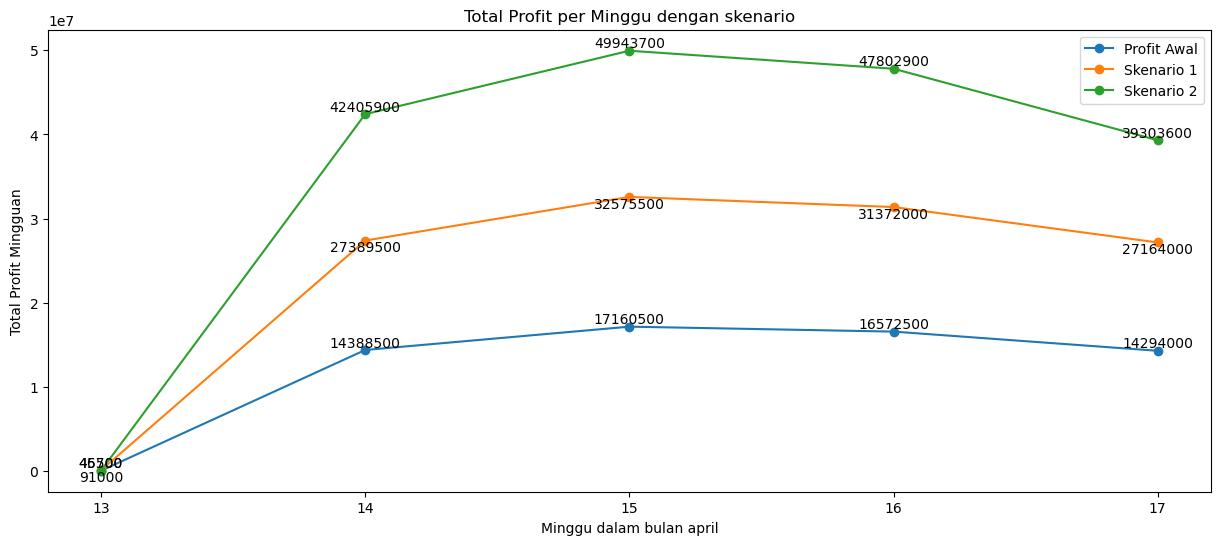

In [1372]:
# Pastikan 'week' tidak perlu dikategorikan jika tidak diperlukan untuk pengurutan
# Jika urutan minggu sudah benar, tidak perlu menggunakan pd.Categorical

plt.figure(figsize=(15, 6))

# Plot data untuk masing-masing skenario
plt.plot(sum_profit_per_day['week'], sum_profit_per_day['payAmount'], label='Profit Awal', marker='o', linestyle='-')
plt.plot(sum_profit_per_day_1['week'], sum_profit_per_day_1['payAmount_per_halte'], label='Skenario 1', marker='o', linestyle='-')
plt.plot(sum_profit_per_day_2['week'], sum_profit_per_day_2['payAmount_per_dist'], label='Skenario 2', marker='o', linestyle='-')

# Menambahkan anotasi untuk setiap titik data
for i, value in enumerate(sum_profit_per_day['payAmount']):
    plt.text(sum_profit_per_day['week'][i], value, f'{value:.0f}', ha='center', va='bottom')

for i, value in enumerate(sum_profit_per_day_1['payAmount_per_halte']):
    plt.text(sum_profit_per_day_1['week'][i], value, f'{value:.0f}', ha='center', va='top')

for i, value in enumerate(sum_profit_per_day_2['payAmount_per_dist']):
    plt.text(sum_profit_per_day_2['week'][i], value, f'{value:.0f}', ha='center', va='bottom')

# Mengatur xticks menggunakan minggu dan label minggu yang benar
# plt.xticks(ticks=weeks, labels=week_labels)

# Mengatur label dan judul
plt.xlabel('Minggu dalam bulan april')
plt.ylabel('Total Profit Mingguan')
plt.title('Total Profit per Minggu dengan skenario')
plt.legend()

plt.show()


`Insight` Lineplot:

**1. Peningkatan dan Penurunan Profit :**
* Skenario 2 (garis hijau) menunjukkan profit yang lebih tinggi dibandingkan dengan profit awal dan biaya perhalte (skenario 1), dimana puncak profitnya ada pada minggu 15, Ini menunjukkan bahwa jika perusahaan ingin mencari profit lebih tinggi perusahaan dapat mengaplikasikan biaya per jarak (skenario 2). tapi perlu diperhatikan sentimen penumpang dikarenakan biaya perjarak dikenakan biaya yang jauh lebih tinggi.

* Skenario 1 (garis oranye) dimana garis berada di antara profit awal dan biaya per jarak, sehingga skenario 1 ini lebih konservatif dibandingkan dengan skenario 2 (biaya per jarak). maka jika perusahaan mengkhawatirkan sentimen pengguna transjakarta ini merupakan skenario yang direkomendasikan untuk penumapng dalam meningkatkan profit perusahaan dengan lebih konservatif.
  
* Profit Awal (garis biru) menunjukkan profit  utama perusahaan saat ini dengan biaya fare Transjakarta stabil di Rp.3500.

**2. Efektivitas Skenario :**
* Skenario 1 & Skenario 2 merupakan yang sama dapat meningkatkan profit perusahaan. tetapi dalam jumlah profit yang kemungkinan dapat dihasilkan jika di implemntasikan akan merujuk pada skenario kedua, tetapi dalam keputusanya akan dikembalikan kepada team bisnis yang memahami sentimen pengguna Transjakarta dan efektivitas profit tersebut. 


# E. Kesimpulan & Rekomendasi 

Dari Analisa di atas maka dapat disimpulkan:

**1. Demography Penumpang secara gender & kelompok usia**
* Dari distribusi pengguna transportasi berdasarkan seluruh kelompok umur, lebih banyak pengguna tipe transportasi transjakarta dibandingkan pengguna pmikrotrans di kalangan semua umur dengan pengguna terbesar tranportasi transjakarta terbesar di kelompok umur 25-37 tahun, sehingga perusahaan dapat mengembangkan fasilitas untuk kelompok umur tersebut

* Dari persentase pie chart juga diketahui pengguna terbesar transportasi ada group wanita yang menggunakan transjakarta,perusahaan disarakan untuk menambah armada bus lebih banyak untuk penumpang khusus wanita

**2. Distribusi Penumpang harian & rush hour :**
* Distribusi penumpang berdasarkan hari dapat dilihat tingkat penumpang lebih banyak di hari-hari weekdays (Senin - Jumat) dibandingkan di hari weekend (Sabtu-Minggu). dari hasil analisa tersebut perusahaan dapat mempertimbangkan untuk mengurangi jumlah armada pada hari weekend demi meningkatkan effisinsi perusahaan.

* Distribusi penumpang berdasarkan waktu dari Lineplot dapat dilihat jumlah penumpang terbanyak ada di jam 5 - 7 pagi dan Jam 3 - 6 Sore, hal tersebut dikarenakan waktu tersebut merupakan jam berangkat dan pulang kantor maka dipertimbangkan perush

**3. Keputusan Strategis dalam peningkatan profit :**

* Skenario 2 bisa menjadi pilihan yang baik jika target perusahaan adalah mendapatkan profit yang lebih tinggi dibandingkan dengan skenario perhitunga biaya perhalte, tetapi perlu diwaspadai sentiment pengguna akan penambahan biaya berdasarkan jarak dikarenakan cost yang akan di kena kan kepada penumapng akan lebih tinggi.

* Skenario 1 menunjukkan pendekatan yang lebih konservatif namun lebih stabil, jika perusahaan ingin meningkatkan profit dengan biaya yang masih dapat diterima oleh masyarakat

* maka jika perusahaan terfokus pada meningkatkan profit, disarankan untuk penerapan biaya dengan tarif jarak (skenario 2), tetapi jika perusahaan ingin melakukan pendekatan yang lebih konservatif maka disarakan untuk menggunakan skenario biaya dengan tarif per halte (skenario 1). 